In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import *

In [5]:
y=np.array([1,2])
y_pred=np.array([5,2])
print('MAE :',mean_absolute_error(y,y_pred))
print('MSE :',mean_squared_error(y,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y,y_pred)))

MAE : 2.0
MSE : 8.0
RMSE : 2.8284271247461903


On utilise la MSE lorsqu'on accorde une importance exponentielle à nos erreurs, on accorde une grande importance aux grandes erreurs.

Il est possible de développer ses propres métriques. 

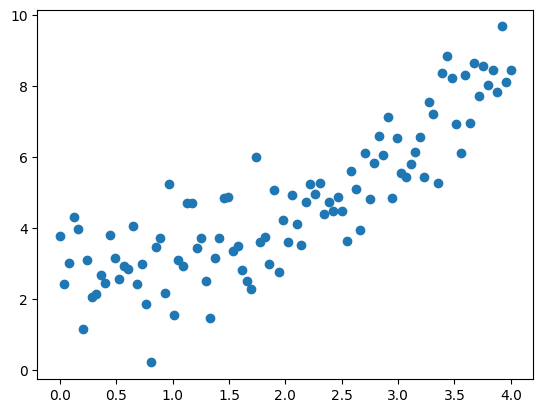

In [10]:
np.random.seed(0)
m=100
x=np.linspace(0,4,m).reshape((m,1))
y=2+x**1.3+np.random.randn(m,1)
y=y.ravel()

plt.scatter(x,y)

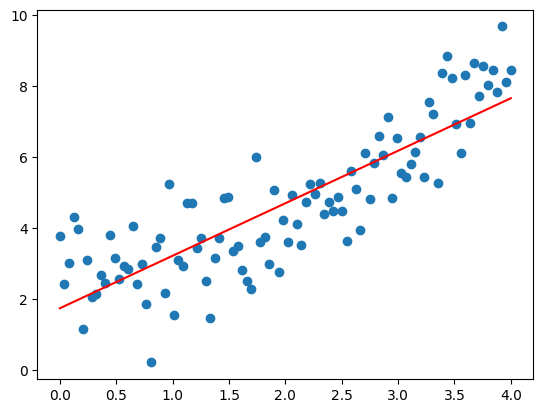

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
model.score(x,y)
predic=model.predict(x)

plt.scatter(x,y)
plt.plot(x,predic,c='r')

Cahier des charges, toutes les valeurs de prédiction ont une tolérance de 20%.

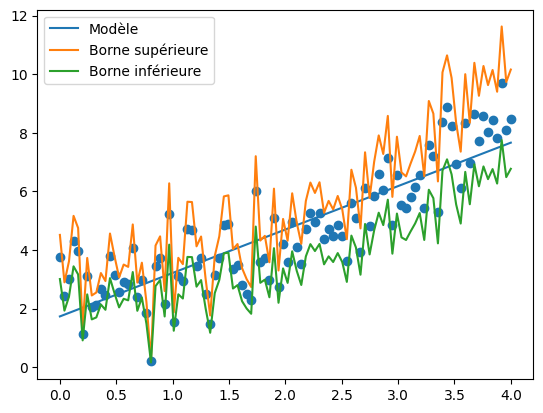

In [17]:
plt.scatter(x,y)
plt.plot(x,predic,label='Modèle')
plt.plot(x,y+y*0.2,label='Borne supérieure')
plt.plot(x,y-y*0.2,label='Borne inférieure')
plt.legend()

Création d'une métrique métier. 

In [19]:
def custom_metric(y,predic):
    return(np.sum((predic<y+y*0.2) & (predic>y-y*0.2))/y.size)

custom_metric(y,predic)

np.float64(0.63)

Ensuite, il faut passer cette fonction dans Make scorer. 

In [21]:
from sklearn.metrics import make_scorer
custom_score=make_scorer(custom_metric,greater_is_better=True)

A présent, il est possible d'utiliser la validation croisée. 

In [23]:
from sklearn.model_selection import cross_val_score,GridSearchCV
cross_val_score(LinearRegression(),x,y,cv=3,scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

Comme on le constate, les scores sont très mauvais. Essayons avec un autre modèle :

In [25]:
from sklearn.svm import SVR
model=SVR(kernel='rbf',degree=3)
params={'gamma':np.arange(0.1,1,0.05)}
grid=GridSearchCV(model,param_grid=params,cv=3,scoring=custom_score)
grid.fit(x,y)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring=make_scorer(custom_metric, response_method='predict'))

In [26]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x)
custom_metric(y,y_pred)

np.float64(0.64)

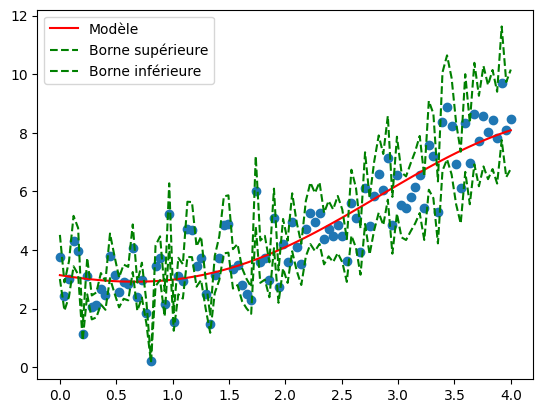

In [31]:
plt.scatter(x,y)
plt.plot(x,y_pred,label='Modèle',c='r')
plt.plot(x,y+y*0.2,label='Borne supérieure',ls='--',c='g')
plt.plot(x,y-y*0.2,label='Borne inférieure',ls='--',c='g')
plt.legend()